In [35]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import glob
import pandas as pd
import random
from shutil import copyfile

from utils.gan_utils import StarGAN_generator, Pix2PixGenerator, CycleGANGenerator
from utils.search_utils import AkiwiFeatureGenerator, ResnetFeatureGenerator, Search, CombinedSearch

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [36]:
StarGAN = StarGAN_generator('./models/stargan/')

Couldn't find model ./models/stargan/pattern.pth


In [57]:
CycleGAN = CycleGANGenerator('./models/cyclegan/bs1_200/')

Couldn't find model ./models/cyclegan/bs1_200/floral_to.pth
Couldn't find model ./models/cyclegan/bs1_200/floral_from.pth


In [26]:
Pix2Pix = Pix2PixGenerator('./models/pix2pix_models.pth')

# Load Search Models

In [27]:
folder_gens = {'akiwi_50': AkiwiFeatureGenerator(50), 
               'akiwi_64': AkiwiFeatureGenerator(64),
               'akiwi_114': AkiwiFeatureGenerator(114),
               'resnet': ResnetFeatureGenerator(),
               'resnet_retrained': ResnetFeatureGenerator('./models/resnet152_retrained.pth')
              }

In [28]:
dress_imgs = '../../data/fashion/dresses/'
model_imgs = '../../data/fashion_models/dresses_clustered2/'

dress_feats = './data/features/fashion/dresses/'
model_feats = './data/features/fashion_models/dresses/'

In [29]:
dress_search = {}
for dir_name, gen in folder_gens.items():
    dress_search[dir_name] = Search(dress_imgs, os.path.join(dress_feats, dir_name), gen)

Loading features from: ./data/features/fashion/dresses/akiwi_50
Loading features from: ./data/features/fashion/dresses/akiwi_64
Loading features from: ./data/features/fashion/dresses/akiwi_114
Loading features from: ./data/features/fashion/dresses/resnet
Loading features from: ./data/features/fashion/dresses/resnet_retrained


In [30]:
model_search = {}
for dir_name, gen in folder_gens.items():
    model_search[dir_name] = Search(model_imgs, os.path.join(model_feats, dir_name), gen)

Loading features from: ./data/features/fashion_models/dresses/akiwi_50
Loading features from: ./data/features/fashion_models/dresses/akiwi_64
Loading features from: ./data/features/fashion_models/dresses/akiwi_114
Loading features from: ./data/features/fashion_models/dresses/resnet
Loading features from: ./data/features/fashion_models/dresses/resnet_retrained


In [31]:
# combined search
dress_search['resnet_50'] = CombinedSearch([dress_search['akiwi_50'], dress_search['resnet']], factors=[2, 1])
model_search['resnet_50'] = CombinedSearch([model_search['akiwi_50'], model_search['resnet']], factors=[2, 1])

In [53]:
test_imgs = glob.glob('./data/test_images/dresses/*.jpg')
len(test_imgs)

154

In [59]:
save_dir = './data/cyclegan_results/stripes_to_bs1200/'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

for idx, test_img in enumerate(test_imgs):
    if idx % 10 == 0:
        print(idx)    
    fake_imgs = []
    fake_imgs.append(Image.open(test_img).resize([256,256]))
    fake_imgs.append(CycleGAN.generate_image(Image.open(test_img), 'stripes', 'to'))
    
    dst_img = Image.fromarray(np.concatenate(np.array([np.array(i) for i in fake_imgs]), axis=1))
    dst_img.save(os.path.join(save_dir, os.path.basename(test_img)))

0
10
20
30
40
50
60
70
80
90


KeyboardInterrupt: 

# StarGAN

In [32]:
def plot_img_row(images, img_labels=None):
    fig, axarr = plt.subplots(nrows=1, ncols=len(images), figsize=(len(images)*2, 2))
    
    for i, img in enumerate(images):
        axarr[i].imshow(img)
        axarr[i].set_xticks([])
        axarr[i].set_yticks([])
        
        if img_labels is not None:
            axarr[i].set_title(img_labels[i])
        
    plt.show()

In [33]:
def get_stargan_imgs_for_attr(img, attr):
    
    fake_imgs = []
    values = StarGAN.LABELS[attr]
    for idx, v in enumerate(values):
        
        fake_img = StarGAN.generate_image(img, attr, v)
        fake_imgs.append(fake_img)
    return fake_imgs

In [34]:
test_imgs = glob.glob('./data/test_images/dresses/*.jpg')[:5]

In [7]:
labels = ['short', 'knee', 'long']

for test_img in test_imgs:
    fake_imgs = []
    fake_imgs.append(Image.open(test_img).resize([128,128]))
        
    for label in labels:
        fake_imgs.append(StarGAN.generate_image(Image.open(test_img), 'length', label))
        
    dst_img = Image.fromarray(np.concatenate(np.array([np.array(i) for i in fake_imgs]), axis=1))
    dst_img.save(os.path.join('./data/stargan_results/length', os.path.basename(test_img)))

In [ ]:
Image.open(test_imgs[0])

In [ ]:
Image.fromarray(np.concatenate(np.array([np.array(i) for i in fake_imgs]), axis=1))

In [ ]:
fake_img = Pix2Pix.generate_image(Image.open(test_img))
fake_img

In [ ]:
sim_imgs, _ = model_rn_search.get_similar_images(fake_img, num_imgs=6)
plot_img_row([Image.open(i) for i in [test_img] + sim_imgs])

In [ ]:
sim_imgs, _ = model_50_search.get_similar_images(fake_img, num_imgs=6)
plot_img_row([Image.open(i) for i in [test_img] + sim_imgs])

In [ ]:
test_img_path = './test_images/dresses_sample/5641460_552693338.jpg'
test_img = Image.open(test_img_path)

In [49]:
test_img = './data/test_images/dresses/BJ721C067-G11.jpg'
fake = CycleGAN.generate_image(Image.open(test_img), 'stripes', 'to')

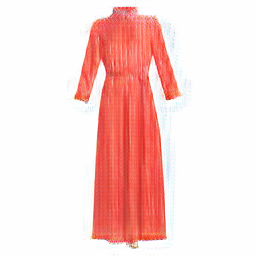

In [50]:
fake

In [ ]:
fake_sleeves = get_stargan_imgs_for_attr(test_img, 'sleeve_length')
plot_img_row([test_img] + fake_sleeves, img_labels=['Original'] + StarGAN.LABELS['sleeve_length'])

In [ ]:
fake_pattern = get_stargan_imgs_for_attr(test_img, 'pattern')
plot_img_row([test_img] + fake_pattern, img_labels=['Original'] + StarGAN.LABELS['pattern'])

In [ ]:
for fake_img in fake_sleeves:
    sim_imgs = dress_rn_search.get_similar_images(fake_img, num_imgs=6)
    sim_imgs = [fake_img] + sim_imgs
    plot_img_row(sim_imgs)

In [ ]:
for fake_img in fake_pattern:
    sim_imgs = dress_rn_search.get_similar_images(fake_img, num_imgs=6)
    sim_imgs = [fake_img] + sim_imgs
    plot_img_row(sim_imgs)

In [ ]:
for fake_img in fake_pattern:
    sim_imgs = dress_114_search.get_similar_images(fake_img, num_imgs=6)
    sim_imgs = [fake_img] + sim_imgs
    plot_img_row(sim_imgs)

In [ ]:
# pix2pix
model_imgs = [Pix2Pix.generate_image(img) for img in [test_img] + fake_pattern]
plot_img_row(model_imgs, img_labels=['original'] + StarGAN.LABELS['pattern'])

In [ ]:
# pix2pix
model_imgs = [Pix2Pix.generate_image(img) for img in [test_img] + fake_sleeves]
plot_img_row(model_imgs, img_labels=['original'] + StarGAN.LABELS['sleeve_length'])

In [ ]:
for fake_img in model_imgs:
    sim_imgs = model_rn_search.get_similar_images(fake_img, num_imgs=6)
    sim_imgs = [fake_img] + sim_imgs
    plot_img_row(sim_imgs)

In [ ]:
Pix2Pix.generate_image(test_imgs[0])